# Comparing different point interpolation approaches.

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

from metpy.mapping.map_functions import interpolate, remove_nans_and_repeats
from metpy.mapping.tests.test_MPGridding import station_test_data

from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)

from_proj = ccrs.Geodetic()
to_proj = ccrs.AlbersEqualArea(central_longitude=-97.0000, central_latitude=38.0000)

levels = list(range(-20, 20, 1))
cmap = plt.get_cmap('jet')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

x, y, temp = station_test_data("air_temperature", from_proj, to_proj)

x, y, temp = remove_nans_and_repeats(x, y, temp)


In [2]:
from scipy.spatial.distance import cdist

np.mean((cdist(list(zip(x,y)), list(zip(x,y)))))

1606700.1001723087

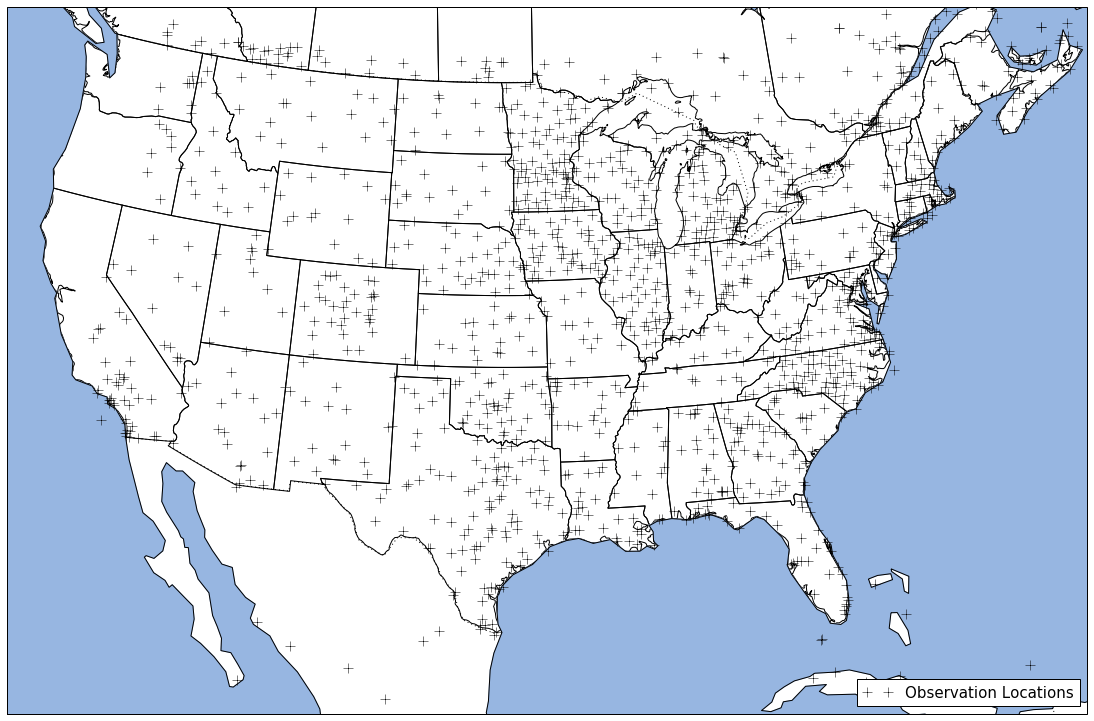

In [3]:
view = plt.axes([0,0,1,1], projection=to_proj)
view.set_extent([-120, -70, 20, 50])
view.add_feature(cartopy.feature.NaturalEarthFeature(
                                category='cultural',
                                name='admin_1_states_provinces_lakes',
                                scale='50m',
                                facecolor='none'))
view.add_feature(cartopy.feature.OCEAN)
view.add_feature(cartopy.feature.COASTLINE)
view.add_feature(cartopy.feature.BORDERS, linestyle=':')

view.plot(x, y, "k+", markersize=10, label="Observation Locations")
plt.legend(loc=4, prop={'size':15})

# Nearest neighbor interpolation

http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.NearestNDInterpolator.html#scipy.interpolate.NearestNDInterpolator

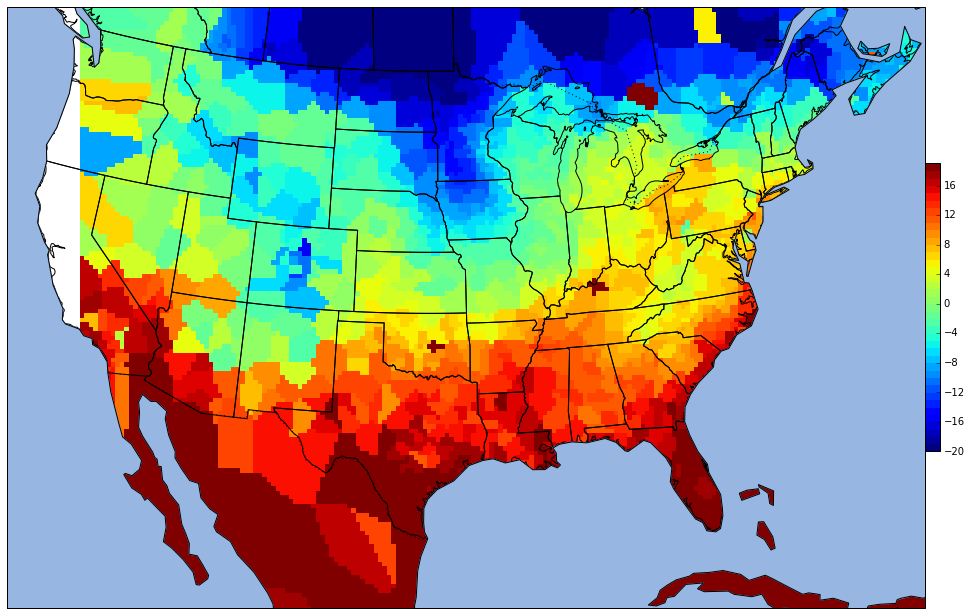

In [4]:
gx, gy, img = interpolate(x, y, temp, interp_type='nearest', hres=25000)

view = plt.axes([0,0,1,1], projection=to_proj)
view.set_extent([-120, -70, 20, 50])
view.add_feature(cartopy.feature.NaturalEarthFeature(
                                category='cultural',
                                name='admin_1_states_provinces_lakes',
                                scale='50m',
                                facecolor='none'))
view.add_feature(cartopy.feature.OCEAN)
view.add_feature(cartopy.feature.COASTLINE)
view.add_feature(cartopy.feature.BORDERS, linestyle=':')

mmb = view.pcolormesh(gx, gy, img, cmap=cmap, norm=norm)
plt.colorbar(mmb, shrink=.4, pad=0, boundaries=levels)

# Linear interpolation

http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.LinearNDInterpolator.html#scipy.interpolate.LinearNDInterpolator

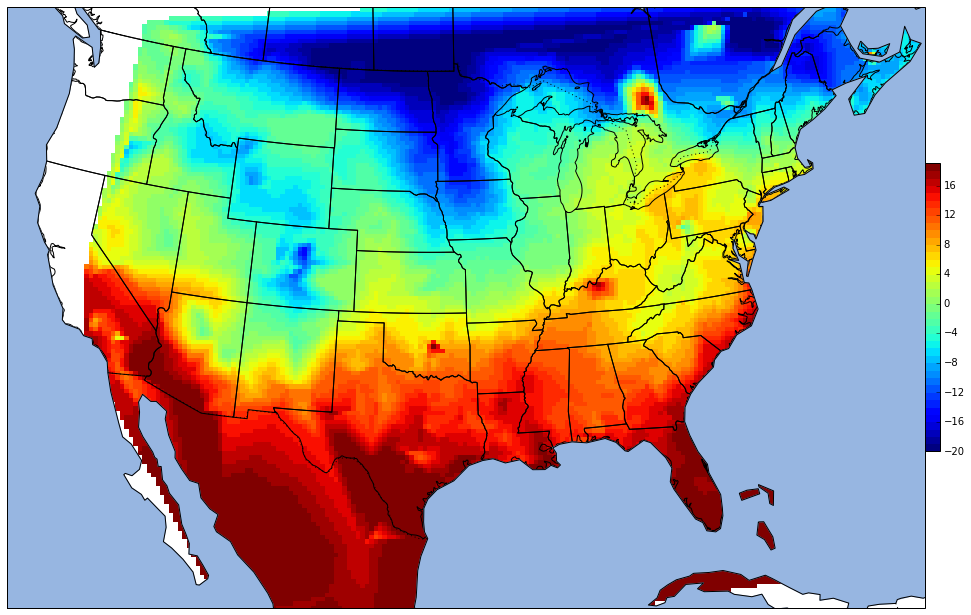

In [5]:
gx, gy, img = interpolate(x, y, temp, interp_type='linear', hres=25000)
view = plt.axes([0,0,1,1], projection=to_proj)
view.set_extent([-120, -70, 20, 50])
view.add_feature(cartopy.feature.NaturalEarthFeature(
                                category='cultural',
                                name='admin_1_states_provinces_lakes',
                                scale='50m',
                                facecolor='none'))
view.add_feature(cartopy.feature.OCEAN)
view.add_feature(cartopy.feature.COASTLINE)
view.add_feature(cartopy.feature.BORDERS, linestyle=':')

mmb = view.pcolormesh(gx, gy, img, cmap=cmap, norm=norm)
plt.colorbar(mmb, shrink=.4, pad=0, boundaries=levels)

# Cubic interpolation

http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.CloughTocher2DInterpolator.html#scipy.interpolate.CloughTocher2DInterpolator

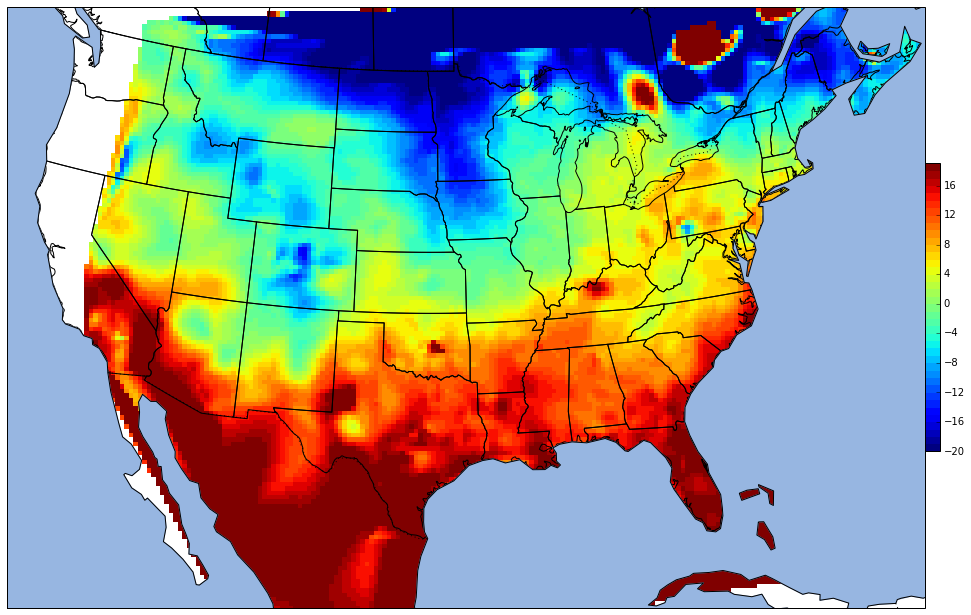

In [6]:
gx, gy, img = interpolate(x, y, temp, interp_type='cubic', hres=25000)
view = plt.axes([0,0,1,1], projection=to_proj)
view.set_extent([-120, -70, 20, 50])
view.add_feature(cartopy.feature.NaturalEarthFeature(
                                category='cultural',
                                name='admin_1_states_provinces_lakes',
                                scale='50m',
                                facecolor='none'))
view.add_feature(cartopy.feature.OCEAN)
view.add_feature(cartopy.feature.COASTLINE)
view.add_feature(cartopy.feature.BORDERS, linestyle=':')

mmb = view.pcolormesh(gx, gy, img, cmap=cmap, norm=norm)
plt.colorbar(mmb, shrink=.4, pad=0, boundaries=levels)

# Natural neighbor (ncar natgrid implementation)

https://github.com/matplotlib/natgrid

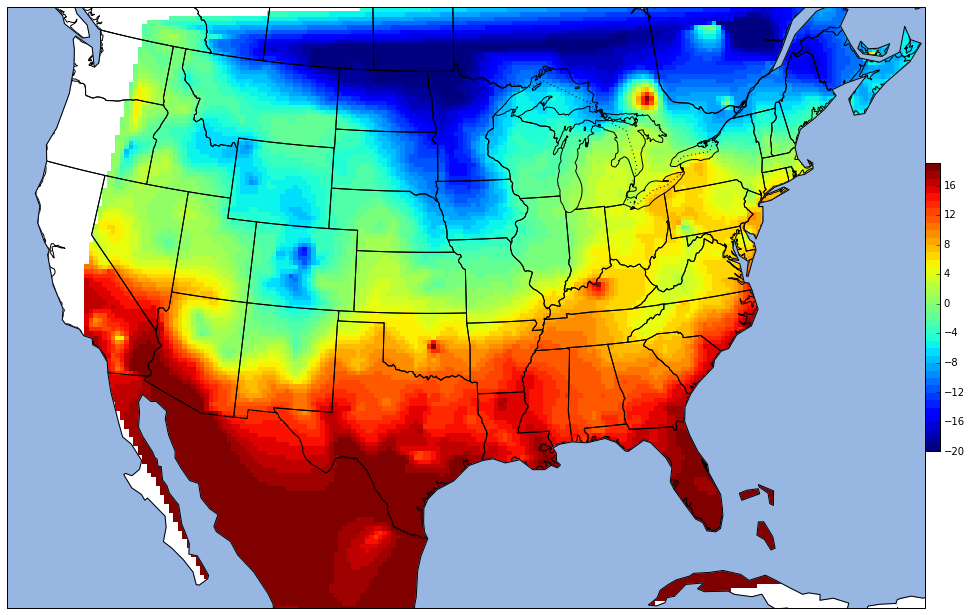

In [7]:
gx, gy, nngrid_img = interpolate(x, y, temp, interp_type='nngrid', hres=25000)
view = plt.axes([0,0,1,1], projection=to_proj)
view.set_extent([-120, -70, 20, 50])
view.add_feature(cartopy.feature.NaturalEarthFeature(
                                category='cultural',
                                name='admin_1_states_provinces_lakes',
                                scale='50m',
                                facecolor='none'))
view.add_feature(cartopy.feature.OCEAN)
view.add_feature(cartopy.feature.COASTLINE)
view.add_feature(cartopy.feature.BORDERS, linestyle=':')

mmb = view.pcolormesh(gx, gy, nngrid_img, cmap=cmap, norm=norm)
plt.colorbar(mmb, shrink=.4, pad=0, boundaries=levels)

# Natural neighbor interpolation (MetPy implementation)

https://github.com/metpy/MetPy/files/138653/cwp-657.pdf

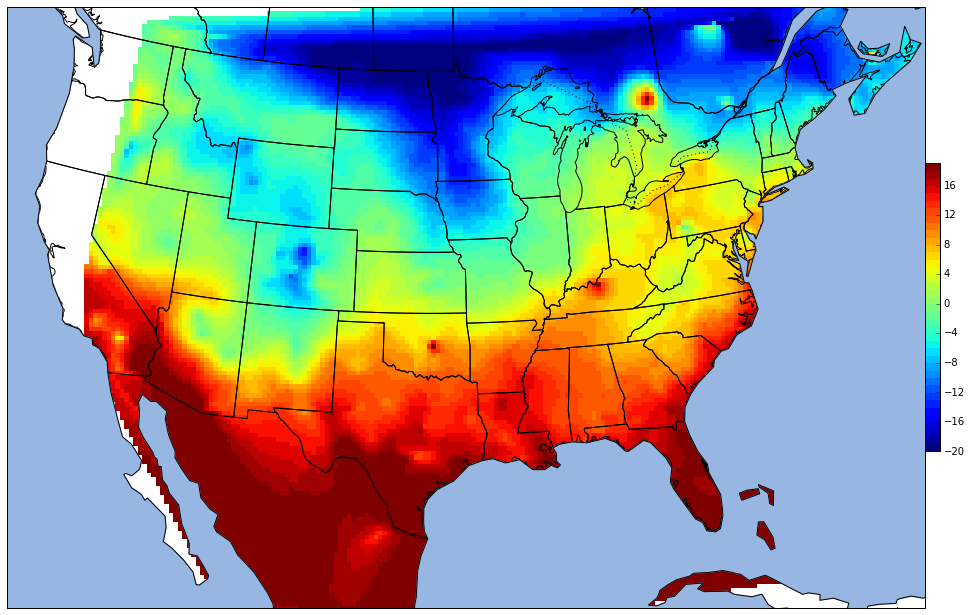

In [8]:
gx, gy, img = interpolate(x, y, temp, interp_type='natural_neighbor', hres=25000)
view = plt.axes([0,0,1,1], projection=to_proj)
view.set_extent([-120, -70, 20, 50])
view.add_feature(cartopy.feature.NaturalEarthFeature(
                                category='cultural',
                                name='admin_1_states_provinces_lakes',
                                scale='50m',
                                facecolor='none'))
view.add_feature(cartopy.feature.OCEAN)
view.add_feature(cartopy.feature.COASTLINE)
view.add_feature(cartopy.feature.BORDERS, linestyle=':')

mmb = view.pcolormesh(gx, gy, img, cmap=cmap, norm=norm)
plt.colorbar(mmb, shrink=.4, pad=0, boundaries=levels)

# Cressman interpolation

Default values:

search_radius = average observation spacing

min_neighbors = 3

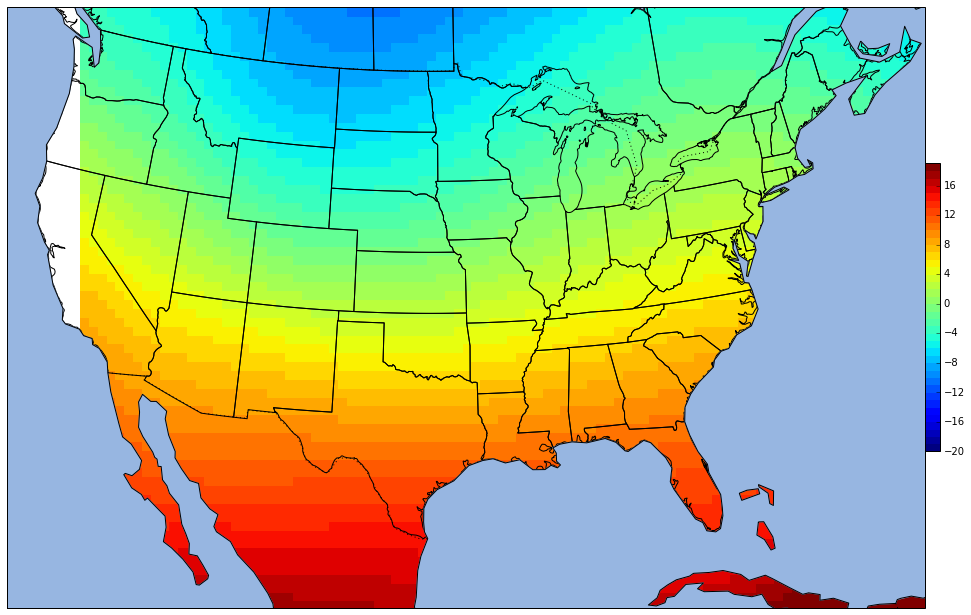

In [9]:
gx, gy, img = interpolate(x, y, temp, interp_type='cressman')
view = plt.axes([0,0,1,1], projection=to_proj)
view.set_extent([-120, -70, 20, 50])
view.add_feature(cartopy.feature.NaturalEarthFeature(
                                category='cultural',
                                name='admin_1_states_provinces_lakes',
                                scale='50m',
                                facecolor='none'))
view.add_feature(cartopy.feature.OCEAN)
view.add_feature(cartopy.feature.COASTLINE)
view.add_feature(cartopy.feature.BORDERS, linestyle=':')

mmb = view.pcolormesh(gx, gy, img, cmap=cmap, norm=norm)
plt.colorbar(mmb, shrink=.4, pad=0, boundaries=levels)

# Cressman interpolation

search_radius = 100 km

min_neighbors = 1

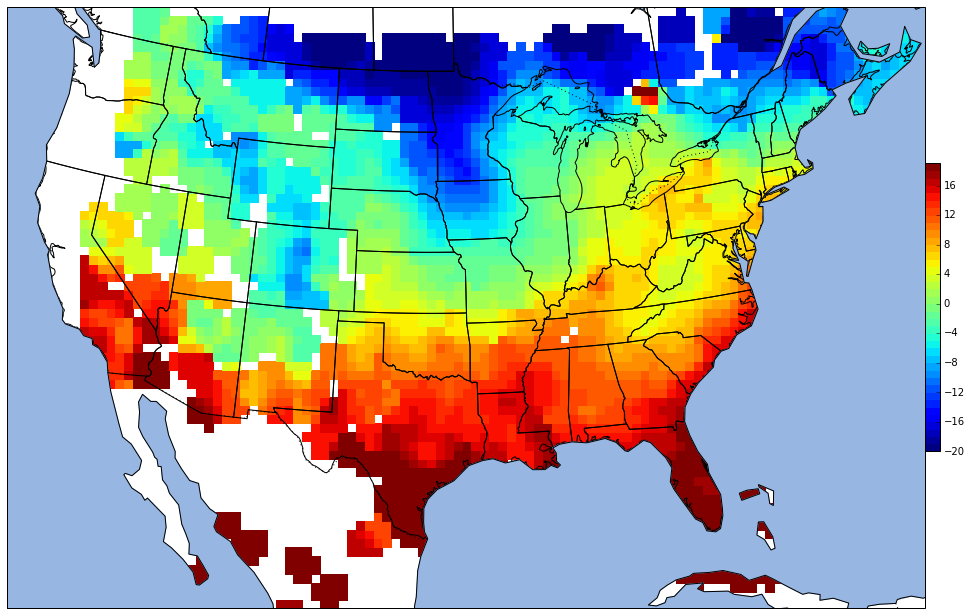

In [10]:
gx, gy, img = interpolate(x, y, temp, interp_type='cressman', minimum_neighbors=1, search_radius=100000)
view = plt.axes([0,0,1,1], projection=to_proj)
view.set_extent([-120, -70, 20, 50])
view.add_feature(cartopy.feature.NaturalEarthFeature(
                                category='cultural',
                                name='admin_1_states_provinces_lakes',
                                scale='50m',
                                facecolor='none'))
view.add_feature(cartopy.feature.OCEAN)
view.add_feature(cartopy.feature.COASTLINE)
view.add_feature(cartopy.feature.BORDERS, linestyle=':')

mmb = view.pcolormesh(gx, gy, img, cmap=cmap, norm=norm)
plt.colorbar(mmb, shrink=.4, pad=0, boundaries=levels)

# Barnes Interpolation

gamma = .1

search_radius = 100km

min_neighbors = 3

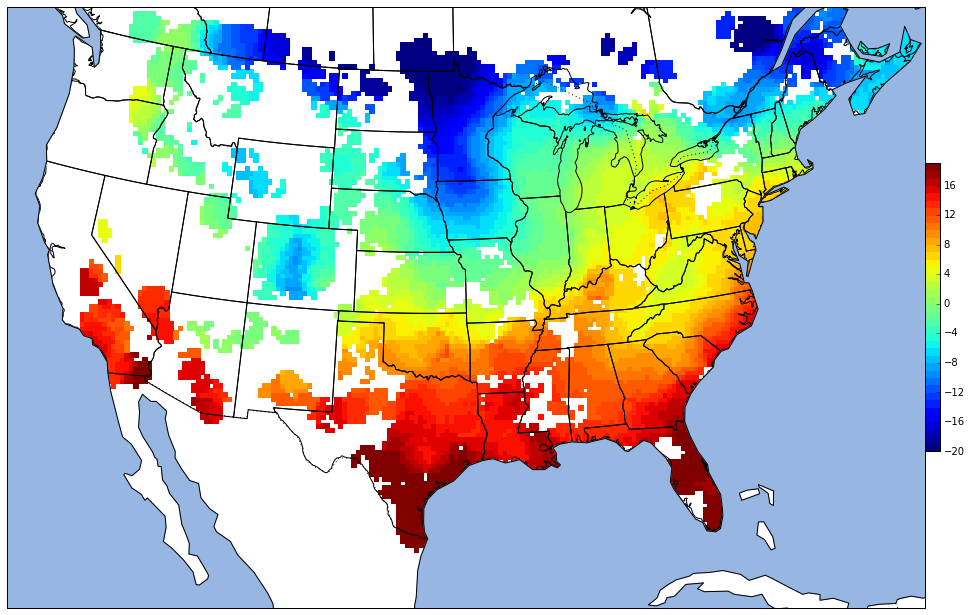

In [11]:
gx, gy, img1 = interpolate(x, y, temp, interp_type='barnes', hres=25000, gamma=.1, search_radius=100000)
view = plt.axes([0,0,1,1], projection=to_proj)
view.set_extent([-120, -70, 20, 50])
view.add_feature(cartopy.feature.NaturalEarthFeature(
                                category='cultural',
                                name='admin_1_states_provinces_lakes',
                                scale='50m',
                                facecolor='none'))
view.add_feature(cartopy.feature.OCEAN)
view.add_feature(cartopy.feature.COASTLINE)
view.add_feature(cartopy.feature.BORDERS, linestyle=':')

mmb = view.pcolormesh(gx, gy, img1, cmap=cmap, norm=norm)
plt.colorbar(mmb, shrink=.4, pad=0, boundaries=levels)

# Barnes Interpolation

gamma = .99

search_radius = 100km

min_neighbors = 3

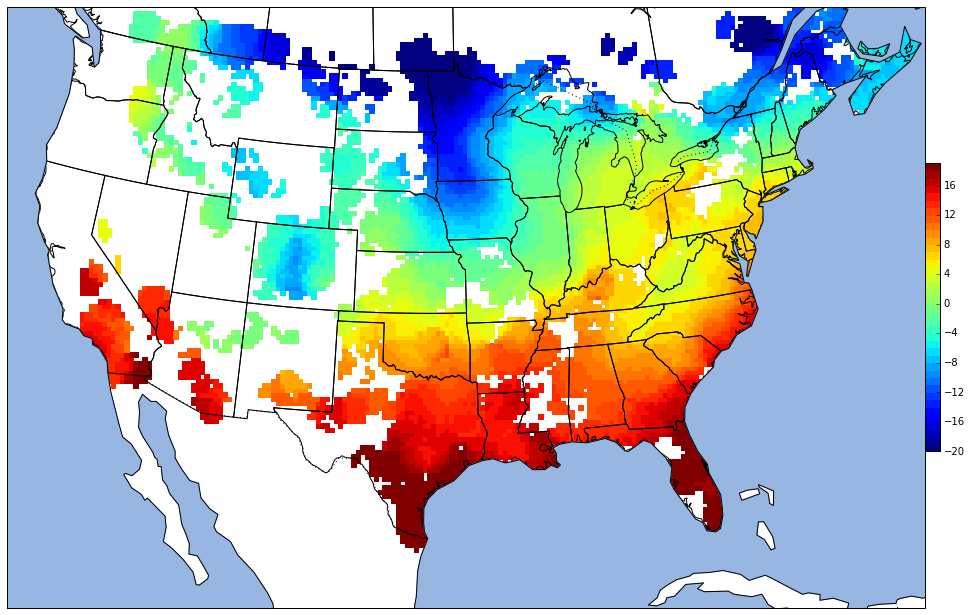

In [12]:
gx, gy, img2 = interpolate(x, y, temp, interp_type='barnes', hres=25000, gamma=.99, search_radius=100000)
view = plt.axes([0,0,1,1], projection=to_proj)
view.set_extent([-120, -70, 20, 50])
view.add_feature(cartopy.feature.NaturalEarthFeature(
                                category='cultural',
                                name='admin_1_states_provinces_lakes',
                                scale='50m',
                                facecolor='none'))
view.add_feature(cartopy.feature.OCEAN)
view.add_feature(cartopy.feature.COASTLINE)
view.add_feature(cartopy.feature.BORDERS, linestyle=':')

mmb = view.pcolormesh(gx, gy, img2, cmap=cmap, norm=norm)
plt.colorbar(mmb, shrink=.4, pad=0, boundaries=levels)

# Barnes Interpolation

gamma = .8

search_radius = 300km

min_neighbors = 3

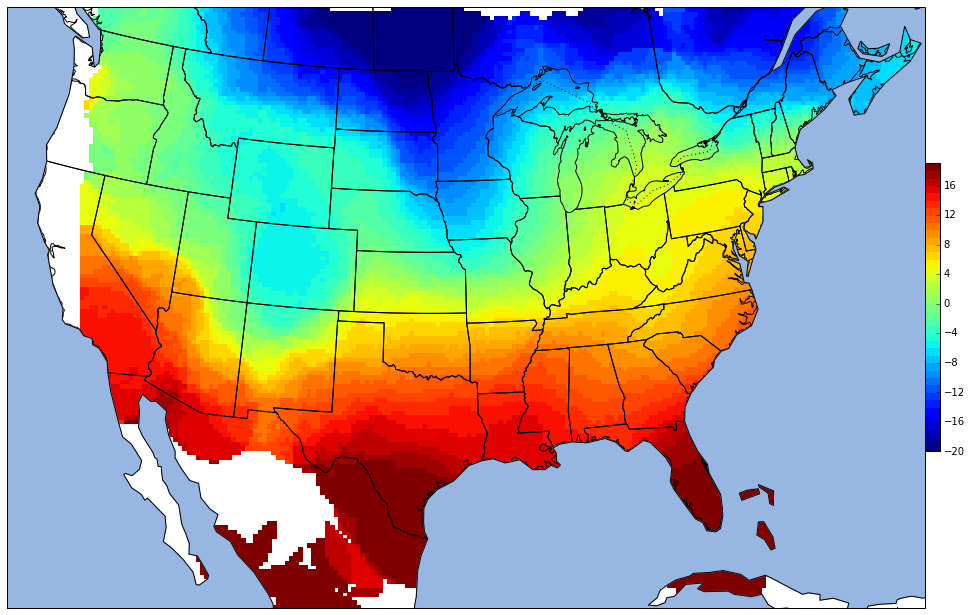

In [13]:
gx, gy, img1 = interpolate(x, y, temp, interp_type='barnes', hres=25000, gamma=.2, search_radius=300000)
view = plt.axes([0,0,1,1], projection=to_proj)
view.set_extent([-120, -70, 20, 50])
view.add_feature(cartopy.feature.NaturalEarthFeature(
                                category='cultural',
                                name='admin_1_states_provinces_lakes',
                                scale='50m',
                                facecolor='none'))
view.add_feature(cartopy.feature.OCEAN)
view.add_feature(cartopy.feature.COASTLINE)
view.add_feature(cartopy.feature.BORDERS, linestyle=':')

mmb = view.pcolormesh(gx, gy, img1, cmap=cmap, norm=norm)
plt.colorbar(mmb, shrink=.4, pad=0, boundaries=levels)

# Radial basis functions interpolation

multiquadric

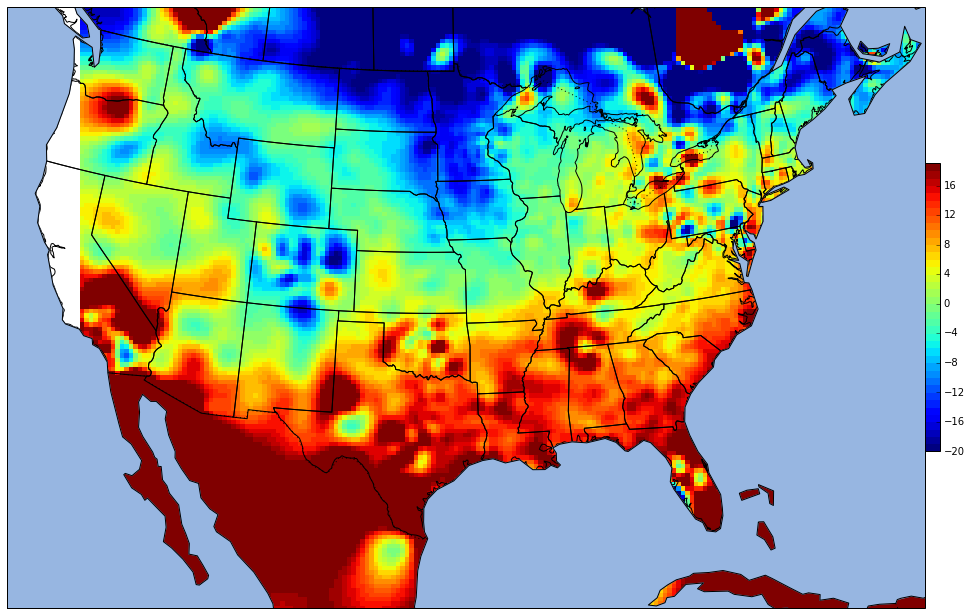

In [14]:
gx, gy, img = interpolate(x, y, temp, interp_type='rbf', hres=25000, rbf_func='multiquadric', rbf_smooth=0)

view = plt.axes([0,0,1,1], projection=to_proj)
view.set_extent([-120, -70, 20, 50])
view.add_feature(cartopy.feature.NaturalEarthFeature(
                                category='cultural',
                                name='admin_1_states_provinces_lakes',
                                scale='50m',
                                facecolor='none'))
view.add_feature(cartopy.feature.OCEAN)
view.add_feature(cartopy.feature.COASTLINE)
view.add_feature(cartopy.feature.BORDERS, linestyle=':')

mmb = view.pcolormesh(gx, gy, img, cmap=cmap, norm=norm)
plt.colorbar(mmb, shrink=.4, pad=0, boundaries=levels)

# Radial basis functions interpolation

inverse

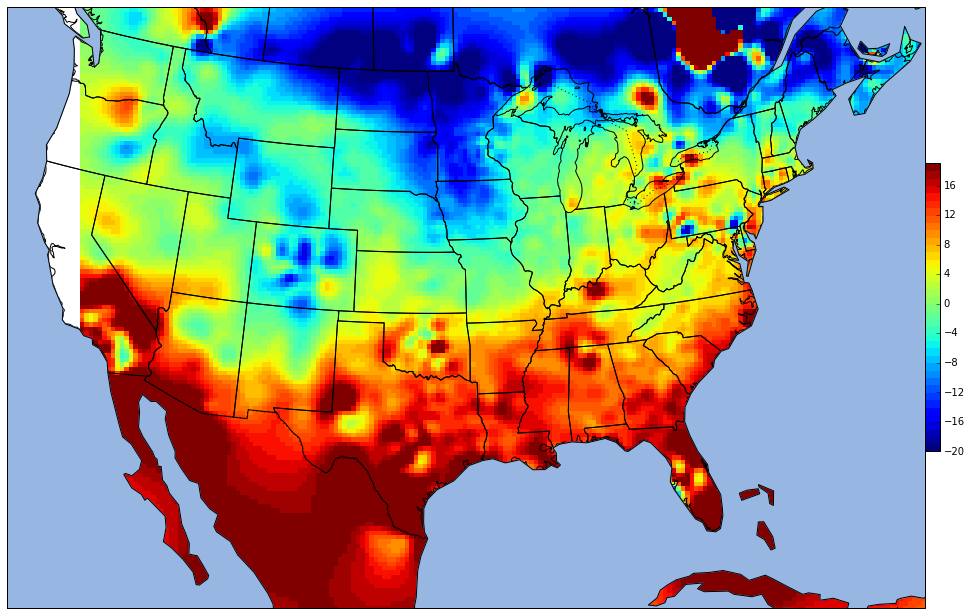

In [15]:
gx, gy, img = interpolate(x, y, temp, interp_type='rbf', hres=25000, rbf_func='inverse', rbf_smooth=0)

view = plt.axes([0,0,1,1], projection=to_proj)
view.set_extent([-120, -70, 20, 50])
view.add_feature(cartopy.feature.NaturalEarthFeature(
                                category='cultural',
                                name='admin_1_states_provinces_lakes',
                                scale='50m',
                                facecolor='none'))
view.add_feature(cartopy.feature.OCEAN)
view.add_feature(cartopy.feature.COASTLINE)
view.add_feature(cartopy.feature.BORDERS, linestyle=':')

mmb = view.pcolormesh(gx, gy, img, cmap=cmap, norm=norm)
plt.colorbar(mmb, shrink=.4, pad=0, boundaries=levels)

# Radial basis functions interpolation

gaussian

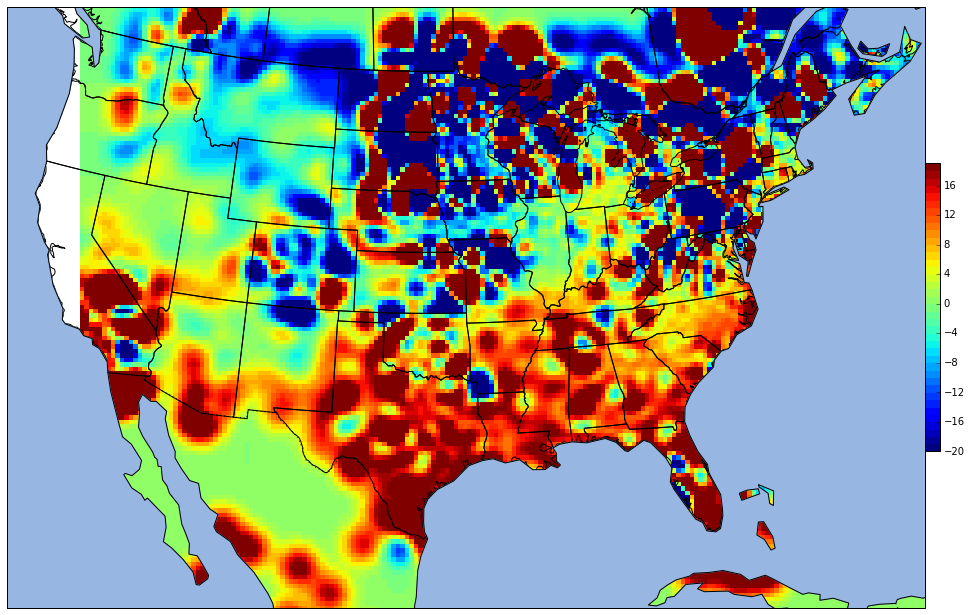

In [16]:
gx, gy, img = interpolate(x, y, temp, interp_type='rbf', hres=25000, rbf_func='gaussian', rbf_smooth=0)

view = plt.axes([0,0,1,1], projection=to_proj)
view.set_extent([-120, -70, 20, 50])
view.add_feature(cartopy.feature.NaturalEarthFeature(
                                category='cultural',
                                name='admin_1_states_provinces_lakes',
                                scale='50m',
                                facecolor='none'))
view.add_feature(cartopy.feature.OCEAN)
view.add_feature(cartopy.feature.COASTLINE)
view.add_feature(cartopy.feature.BORDERS, linestyle=':')

mmb = view.pcolormesh(gx, gy, img, cmap=cmap, norm=norm)
plt.colorbar(mmb, shrink=.4, pad=0, boundaries=levels)

# Radial basis functions interpolation

linear

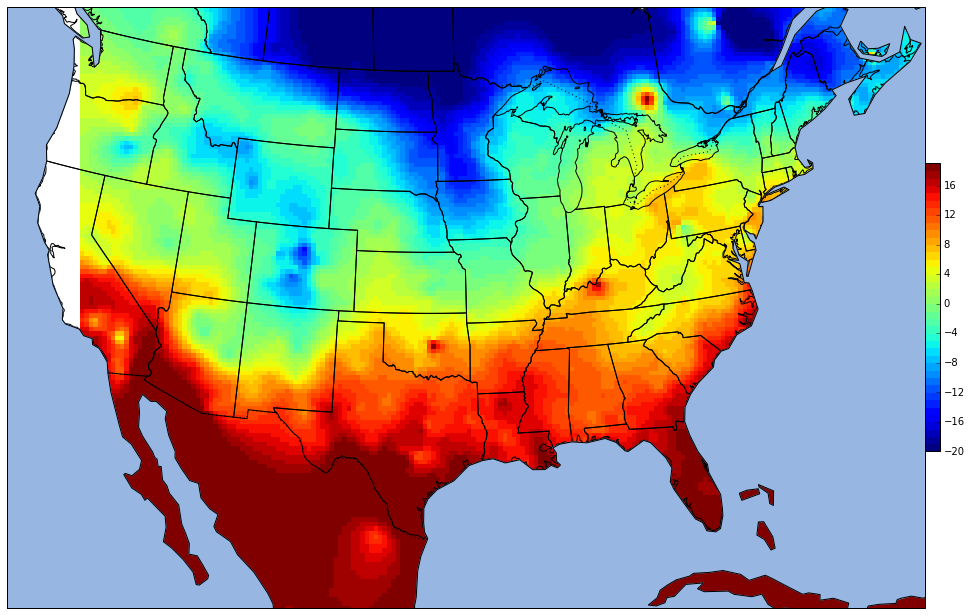

In [17]:
gx, gy, img = interpolate(x, y, temp, interp_type='rbf', hres=25000, rbf_func='linear', rbf_smooth=0)

view = plt.axes([0,0,1,1], projection=to_proj)
view.set_extent([-120, -70, 20, 50])
view.add_feature(cartopy.feature.NaturalEarthFeature(
                                category='cultural',
                                name='admin_1_states_provinces_lakes',
                                scale='50m',
                                facecolor='none'))
view.add_feature(cartopy.feature.OCEAN)
view.add_feature(cartopy.feature.COASTLINE)
view.add_feature(cartopy.feature.BORDERS, linestyle=':')

mmb = view.pcolormesh(gx, gy, img, cmap=cmap, norm=norm)
plt.colorbar(mmb, shrink=.4, pad=0, boundaries=levels)

# Radial basis functions interpolation

cubic

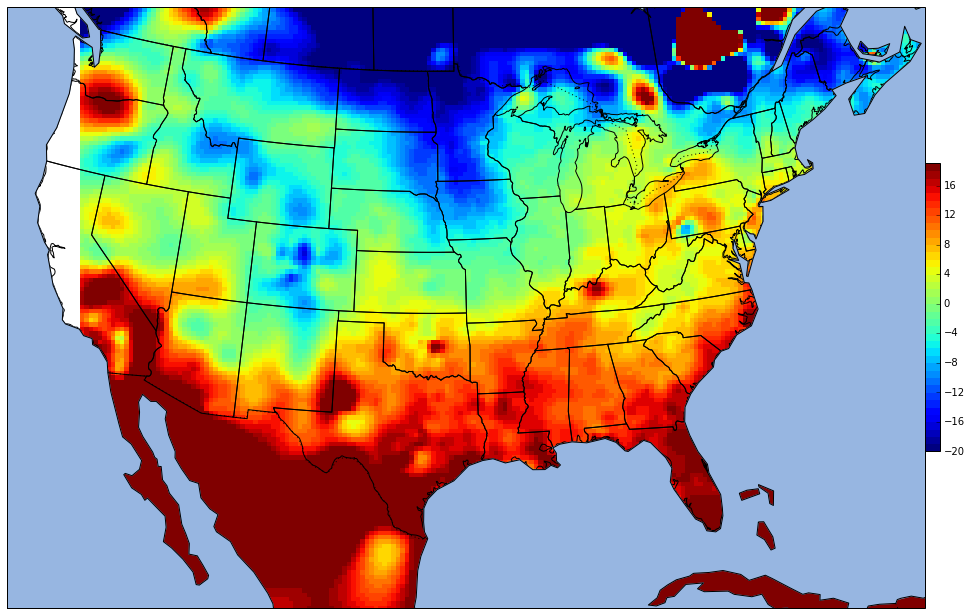

In [18]:
gx, gy, img = interpolate(x, y, temp, interp_type='rbf', hres=25000, rbf_func='cubic', rbf_smooth=0)

view = plt.axes([0,0,1,1], projection=to_proj)
view.set_extent([-120, -70, 20, 50])
view.add_feature(cartopy.feature.NaturalEarthFeature(
                                category='cultural',
                                name='admin_1_states_provinces_lakes',
                                scale='50m',
                                facecolor='none'))
view.add_feature(cartopy.feature.OCEAN)
view.add_feature(cartopy.feature.COASTLINE)
view.add_feature(cartopy.feature.BORDERS, linestyle=':')

mmb = view.pcolormesh(gx, gy, img, cmap=cmap, norm=norm)
plt.colorbar(mmb, shrink=.4, pad=0, boundaries=levels)

# Radial basis functions interpolation

quintic

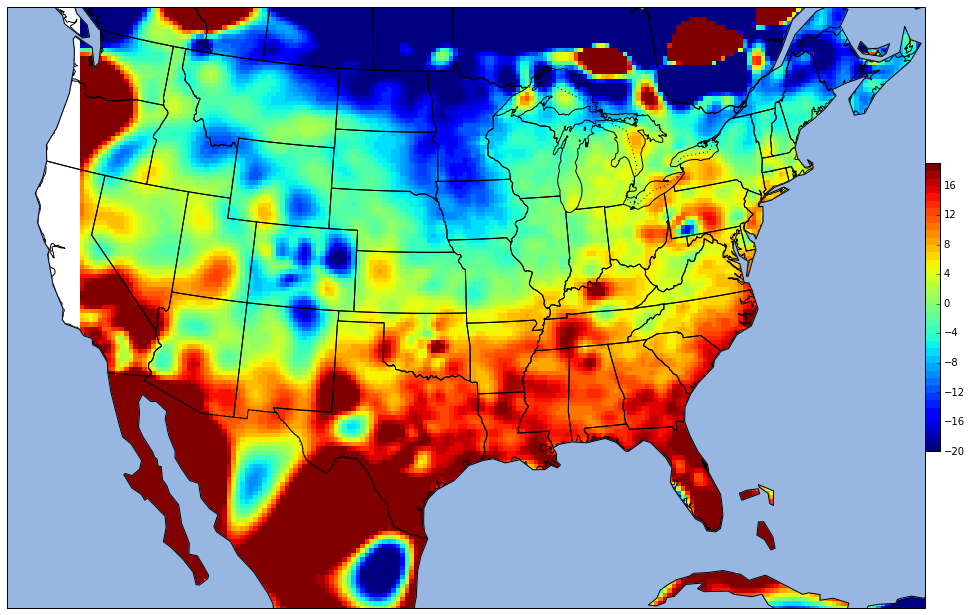

In [19]:
gx, gy, img = interpolate(x, y, temp, interp_type='rbf', hres=25000, rbf_func='quintic', rbf_smooth=0)

view = plt.axes([0,0,1,1], projection=to_proj)
view.set_extent([-120, -70, 20, 50])
view.add_feature(cartopy.feature.NaturalEarthFeature(
                                category='cultural',
                                name='admin_1_states_provinces_lakes',
                                scale='50m',
                                facecolor='none'))
view.add_feature(cartopy.feature.OCEAN)
view.add_feature(cartopy.feature.COASTLINE)
view.add_feature(cartopy.feature.BORDERS, linestyle=':')

mmb = view.pcolormesh(gx, gy, img, cmap=cmap, norm=norm)
plt.colorbar(mmb, shrink=.4, pad=0, boundaries=levels)

# Radial basis functions interpolation

thin_plate

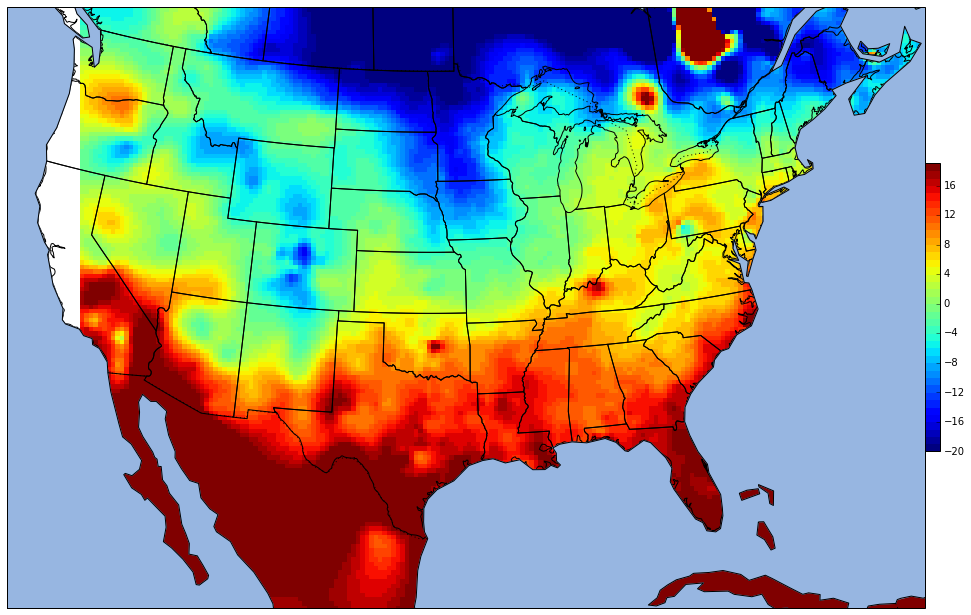

In [20]:
gx, gy, img = interpolate(x, y, temp, interp_type='rbf', hres=25000, rbf_func='thin_plate', rbf_smooth=0)

view = plt.axes([0,0,1,1], projection=to_proj)
view.set_extent([-120, -70, 20, 50])
view.add_feature(cartopy.feature.NaturalEarthFeature(
                                category='cultural',
                                name='admin_1_states_provinces_lakes',
                                scale='50m',
                                facecolor='none'))
view.add_feature(cartopy.feature.OCEAN)
view.add_feature(cartopy.feature.COASTLINE)
view.add_feature(cartopy.feature.BORDERS, linestyle=':')

mmb = view.pcolormesh(gx, gy, img, cmap=cmap, norm=norm)
plt.colorbar(mmb, shrink=.4, pad=0, boundaries=levels)

# Radial basis functions interpolation

linear with smoothing

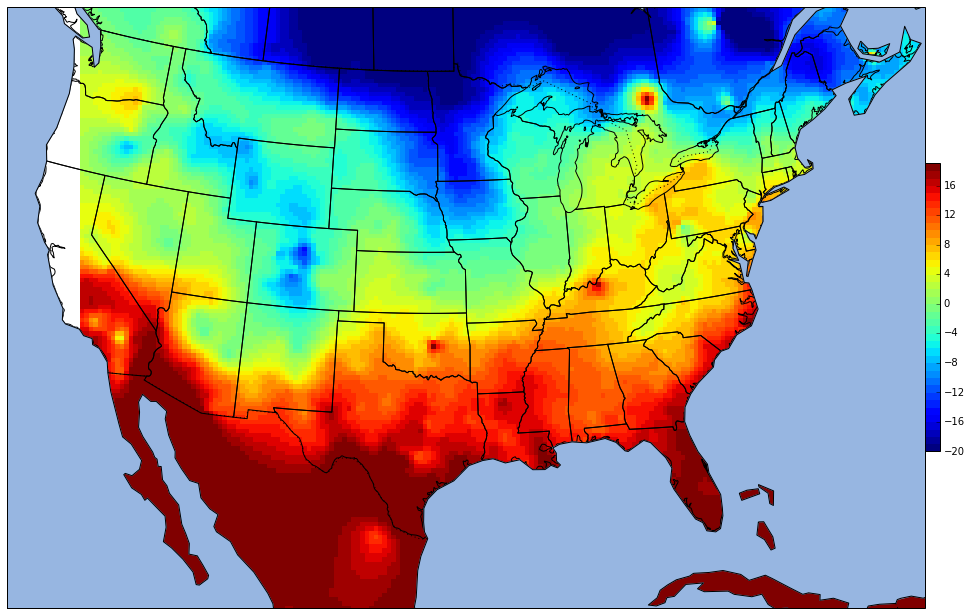

In [21]:
gx, gy, img = interpolate(x, y, temp, interp_type='rbf', hres=25000, rbf_func='linear', rbf_smooth=1)

view = plt.axes([0,0,1,1], projection=to_proj)
view.set_extent([-120, -70, 20, 50])
view.add_feature(cartopy.feature.NaturalEarthFeature(
                                category='cultural',
                                name='admin_1_states_provinces_lakes',
                                scale='50m',
                                facecolor='none'))
view.add_feature(cartopy.feature.OCEAN)
view.add_feature(cartopy.feature.COASTLINE)
view.add_feature(cartopy.feature.BORDERS, linestyle=':')

mmb = view.pcolormesh(gx, gy, img, cmap=cmap, norm=norm)
plt.colorbar(mmb, shrink=.4, pad=0, boundaries=levels)